# Inverse Kinematics for a 3R Manipulator
In this notebook, we'll compute the inverse kinematics of a 3-link (3R) robot arm using the Robotics Toolbox for Python.


In [1]:
import roboticstoolbox as rtb
from math import pi
from spatialmath import SE3
import numpy as np

## Defining the Robot
We'll begin by defining the 3R robot. Each revolute joint (R) will have a standard Denavit-Hartenberg (DH) parameter.


In [2]:
# Define the robot using DH parameters
robot = rtb.DHRobot([
    rtb.RevoluteMDH(d=1),  # Link length = 1
    rtb.RevoluteMDH(a=1, alpha=pi/2),  # Link length = 1
    rtb.RevoluteMDH(a=1)   # Link length = 1
], name="3R_robot")

## Inverse Kinematics
To compute the inverse kinematics, we'll specify a desired end effector position and use the robot's IK methods to compute the joint angles.


In [7]:
from scipy.optimize import minimize

def custom_ikine(robot, T_desired, initial_guess):
    """
    Custom function to compute inverse kinematics using optimization.
    
    Parameters:
    - robot: The robot object
    - T_desired: Desired end-effector pose
    - initial_guess: Initial guess for joint angles
    
    Returns:
    - q: Computed joint angles
    """
    # Define the objective function
    def objective(q):
        T_actual = robot.fkine(q)
        return np.linalg.norm(T_actual.A - T_desired.A)
    
    # Run the optimization
    result = minimize(objective, initial_guess, bounds=[(-pi, pi) for _ in initial_guess])
    return result.x




In [4]:
# Desired end effector pose
T_desired = SE3(1.207, 1.207, 1.707)

# Use the custom IK function
initial_guess = [[0, 0, 0], [pi/2, pi/2,pi/2]]
for init_guess in initial_guess:
    
    q_sol = custom_ikine(robot, T_desired, init_guess)
    print("q solution")
    print(q_sol)

    # Compute forward kinematics
    print("end-effector pose")
    T = robot.fkine(q_sol)
    print(T)

q solution
[ 0.78539752  0.78542628 -1.5708267 ]
end-effector pose
   0.5       0.5       0.7071    1.207     
   0.5       0.5      -0.7071    1.207     
  -0.7071    0.7071    0         1.707     
   0         0         0         1         

q solution
[1.08487203 1.46812197 3.14159265]
end-effector pose
  -0.04787   0.4646    0.8842    0.5149    
  -0.09063   0.8796   -0.467     0.9749    
  -0.9947   -0.1025    0         1.995     
   0         0         0         1         



In [5]:
# Desired end effector pose
T_desired = SE3(1.207, 1.207, 1.707)

# Compute inverse kinematics
q_sol_ik_LM, *_ = robot.ikine_LM(T_desired)  # Note: Some robots might have multiple IK solutions

print(q_sol_ik_LM)

[ 0.78547865  0.78560936 -1.57128868]


## Visualization
Now, let's visualize the robot's configuration for the computed joint angles.


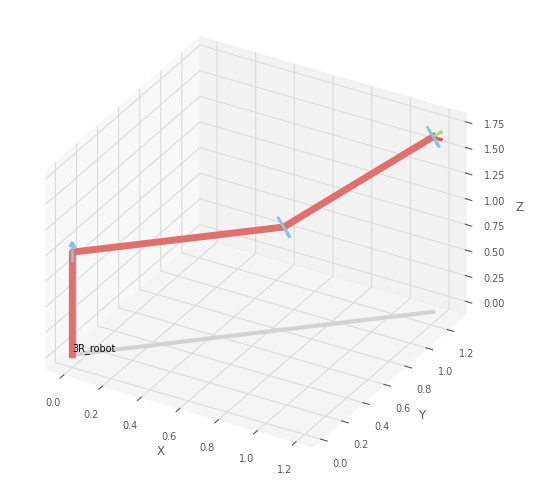

end-effector pose
   0.4998    0.5001    0.7072    1.207     
   0.4999    0.5002   -0.707     1.207     
  -0.7073    0.7069    0         1.707     
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the robot
fig = robot.plot(q_sol_ik_LM, block=False)

# Compute forward kinematics
print("end-effector pose")
T = robot.fkine(q_sol_ik_LM)
print(T)